In [ ]:
#upload csv file

from google.colab import files
uploaded = files.upload()

Saving MLE-Assignment.csv to MLE-Assignment.csv


In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn tensorflow shap fastapi uvicorn optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.8 MB/s eta 0:00:00


In [ ]:
#load dataset

import pandas as pd
df=pd.read_csv('MLE-Assignment.csv')
df.head()
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB
None
                0           1           2           3           4           5  \
count  500.000000  500.000000  500.000000  500.000000  500.000000  500.000000   
mean     0.443118    0.440761    0.433814    0.426122    0.418990    0.412432   
std      0.044719    0.045520    0.045764    0.046070    0.045405    0.044727   
min      0.311182    0.295321    0.284064    0.282054    0.296702    0.286860   
25%      0.410456    0.404310    0.397038    0.389029    0.382102    0.377157   
50%      0.449105    0.442651    0.434215    0.425074    0.417075    0.411872   
75%      0.480245    0.478822    0.473158    0.464947    0.459232    0.452198   
max      0.556287    0.530168    0.528774    0.533202    0.511909    0.501786   

                6           7           8           9  ...         439  \
count  500.000000  

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

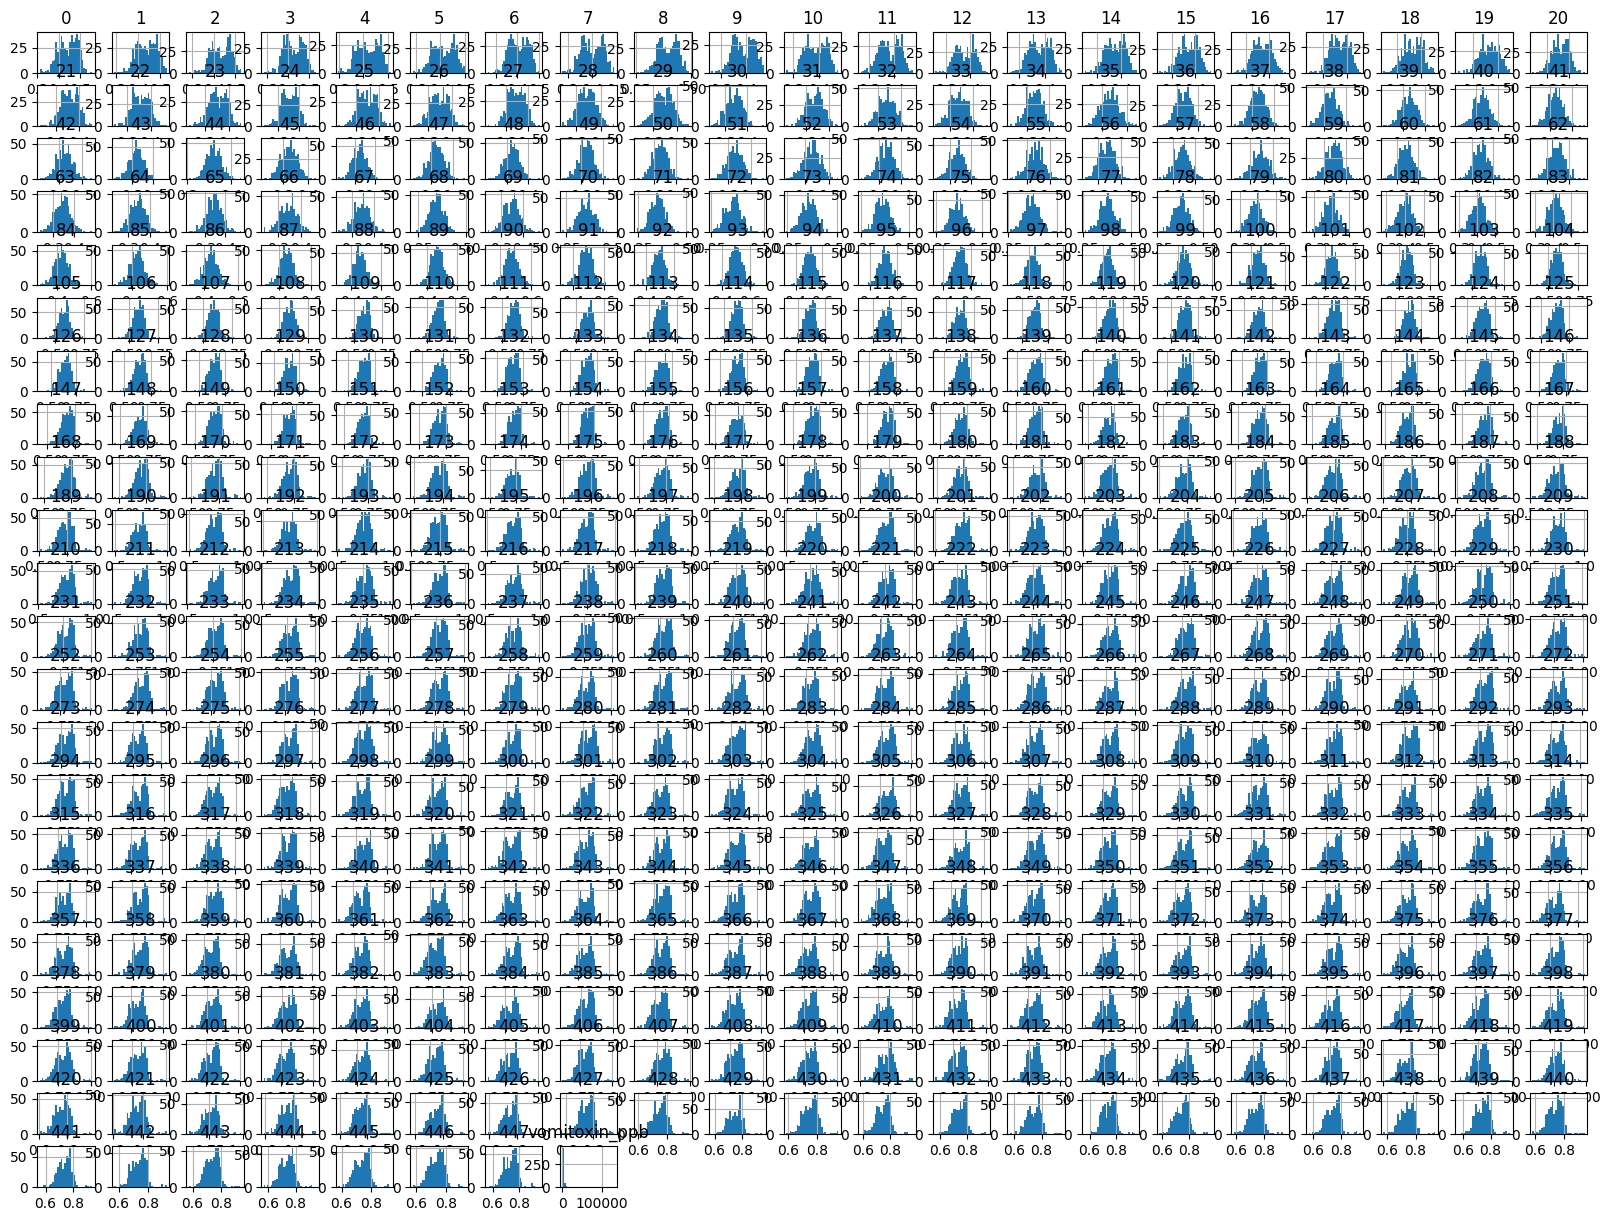

In [ ]:
df.hist(figsize=(20,15), bins=30)
plt.show()

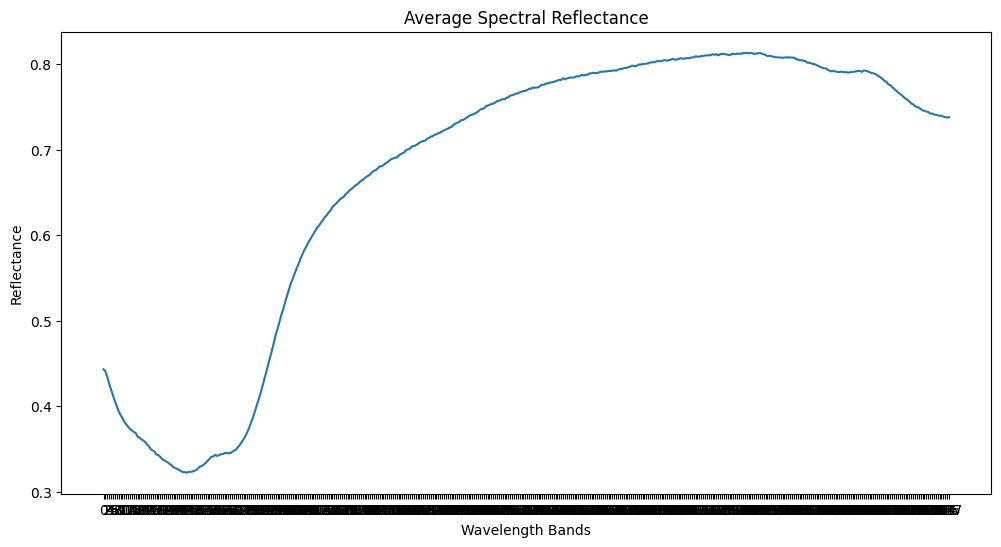

In [ ]:
#line plot for spectral bands

plt.figure(figsize=(12, 6))
sns.lineplot(data=df.drop(['hsi_id','vomitoxin_ppb'],axis=1).mean())
plt.title('Average Spectral Reflectance')
plt.xlabel('Wavelength Bands')
plt.ylabel('Reflectance')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numeric_cols=df.select_dtypes(include=['number']).columns
df=df[numeric_cols]

In [ ]:
df=df.fillna(df.median())  #fill missing values

In [ ]:
X=df.drop(['vomitoxin_ppb'], axis=1)
y=df['vomitoxin_ppb']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)   #normaliz the data

In [ ]:
#split the data

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import optuna
from sklearn.metrics import mean_squared_error

In [ ]:
def objective(trial):
    n_estimators=trial.suggest_int('n_estimators',50,300)
    max_depth=trial.suggest_int('max_depth',5,30)
    model=RandomForestRegressor(n_estimators=n_estimators,max_depth=max_depth)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    return mean_squared_error(y_test,y_pred)

study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=20)

print("Best parameters:",study.best_params)
best_model=RandomForestRegressor(**study.best_params)
best_model.fit(X_train, y_train)

[I 2025-03-24 11:20:12,598] A new study created in memory with name: no-name-5ac58f43-bfc2-430a-b215-02ddceb6891e
[I 2025-03-24 11:20:19,722] Trial 0 finished with value: 142961285.93544254 and parameters: {'n_estimators': 81, 'max_depth': 21}. Best is trial 0 with value: 142961285.93544254.
[I 2025-03-24 11:20:34,850] Trial 1 finished with value: 126913276.34136614 and parameters: {'n_estimators': 179, 'max_depth': 17}. Best is trial 1 with value: 126913276.34136614.
[I 2025-03-24 11:20:50,148] Trial 2 finished with value: 109645561.07006422 and parameters: {'n_estimators': 177, 'max_depth': 20}. Best is trial 2 with value: 109645561.07006422.
[I 2025-03-24 11:21:01,697] Trial 3 finished with value: 124173007.13542625 and parameters: {'n_estimators': 284, 'max_depth': 5}. Best is trial 2 with value: 109645561.07006422.
[I 2025-03-24 11:21:07,414] Trial 4 finished with value: 122934041.23323953 and parameters: {'n_estimators': 138, 'max_depth': 5}. Best is trial 2 with value: 109645561

Best parameters: {'n_estimators': 177, 'max_depth': 20}


RandomForestRegressor(max_depth=20, n_estimators=177)

Mean Absolute Error(MAE):3847.1104691335827
Root Mean Squared Error(RMSE):11410.967375833094
R2 Score:0.5341869338666607


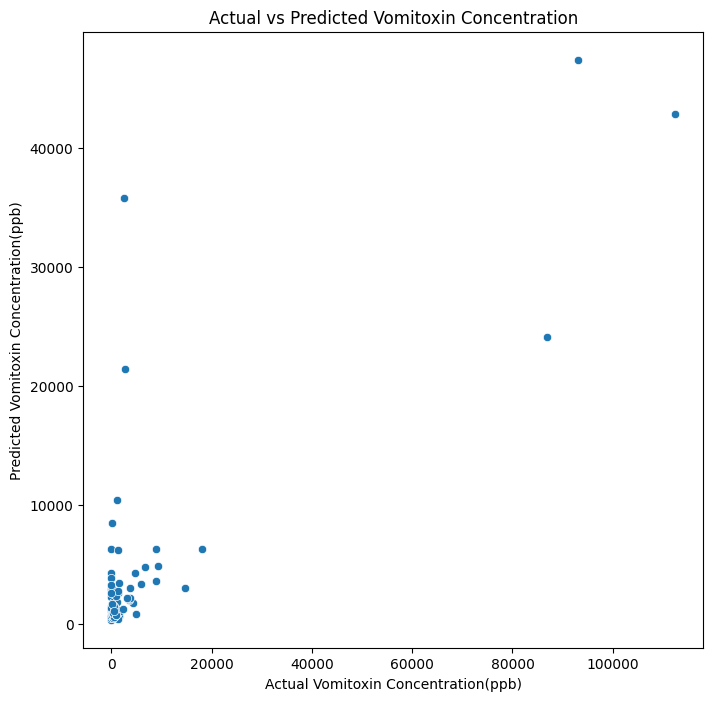

In [ ]:
#Evaluate the model

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred=best_model.predict(X_test)

print(f"Mean Absolute Error(MAE):{mean_absolute_error(y_test,y_pred)}")
print(f"Root Mean Squared Error(RMSE):{np.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R2 Score:{r2_score(y_test,y_pred)}")

# Visualization
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test,y=y_pred)
plt.xlabel('Actual Vomitoxin Concentration(ppb)')
plt.ylabel('Predicted Vomitoxin Concentration(ppb)')
plt.title('Actual vs Predicted Vomitoxin Concentration')
plt.show()

 99%|===================| 397/400 [00:14<00:00]       

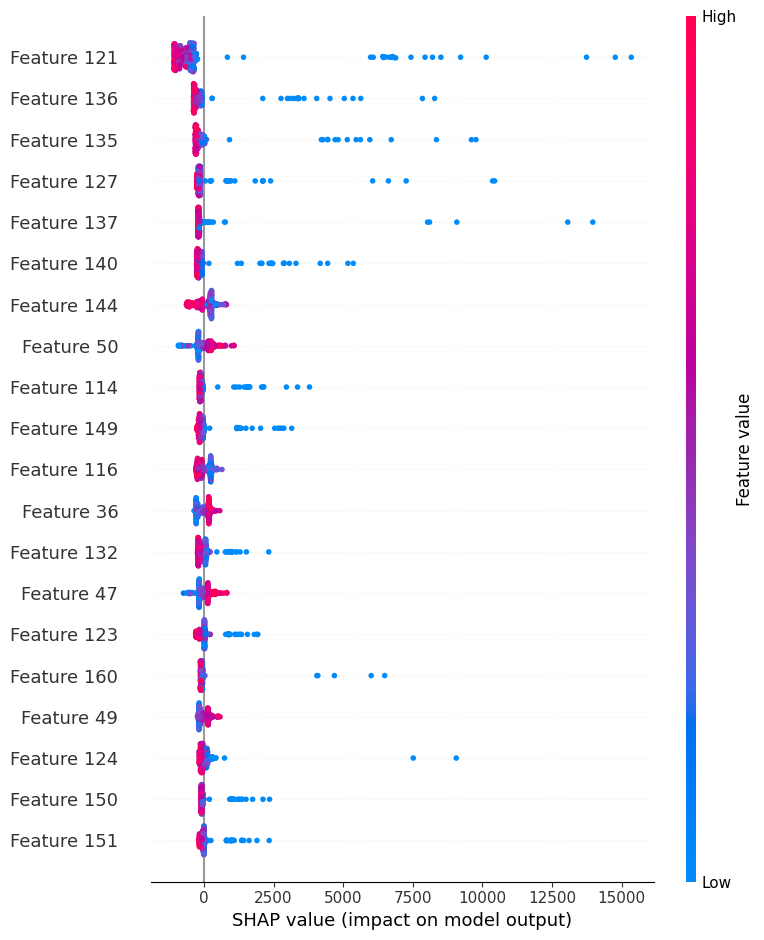

In [ ]:
#Model explainability with SHAP

import shap
explainer=shap.Explainer(best_model, X_train)
shap_values=explainer(X_train)

shap.summary_plot(shap_values, X_train)

In [ ]:
import joblib

joblib.dump(best_model,'mycotoxin_model.pkl')
from google.colab import drive
drive.mount('/content/drive')
!cp mycotoxin_model.pkl /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
